In [56]:
library(dplyr)
library(tibble)
library(tidyr)

library(Biobase)
library(pvca)

library(ggplot2)
library(cowplot)
theme_set(theme_bw())

In [57]:
options(repr.plot.width = 6, repr.plot.height = 4)

In [66]:
source("../R/gpca.R")
source("../R/rvp.R")

In [59]:
# source files
src_files <- list.files('../../relapse_prediction/R', full.names = TRUE)
for (f in src_files) {
  source(f)
  cat(sprintf('Sourced file: %s\n', f))
}

Sourced file: ../../relapse_prediction/R/batch.R
Sourced file: ../../relapse_prediction/R/calc.R
Sourced file: ../../relapse_prediction/R/misc.R
Sourced file: ../../relapse_prediction/R/normalise.R
Sourced file: ../../relapse_prediction/R/plot.R
Sourced file: ../../relapse_prediction/R/predict.R
Sourced file: ../../relapse_prediction/R/subset.R
Sourced file: ../../relapse_prediction/R/utils.R


In [60]:
quantify_batch <- function(X, metadata) {
  batch <- metadata[colnames(X), 'batch']
  class <- metadata[colnames(X), 'class']

  rvp <- RVP(t(X), batch, class)
  gpca <- gPCA(t(X), batch)
    
  # create expressionset from biobase package
  meta_metadata <- data.frame(labelDescription = colnames(metadata))
  pheno_data <- new(
    "AnnotatedDataFrame",
    data = metadata, varMetadata = meta_metadata
  )
  eset <- ExpressionSet(assayData = as.matrix(X), phenoData = pheno_data)
  pvca_obj <- pvcaBatchAssess(eset, c('batch', 'class'), 0.6)
  var_pcts <- as.vector(pvca_obj$dat)
  names(var_pcts) <- as.vector(pvca_obj$label)

  c(
    gpca = gpca$delta,
    pvca = var_pcts['batch'],
    rvp = rvp
  )
}

# Measuring batch effects
- Different batch-class imbalance
- No batch effects
- Different magnitude of batch effects when there is batch-class imbalance
- Measure when there is different number of features
- Different batch sizes

### Comparisons
- gPCA delta: 0-1 (proportion of variance)
    - Weak in quantifying small amounts of batch effects?
    - Problems when there is no batch effects but there is class imbalance

# BatchQC - Different batch delta

## Theoretical variance - Different batch delta
- Measures the sample variance of vector of differences for feature $i$ where each element is $E(X_{ijkg}' - X_{ijkg})$

In [61]:
# Computes variance due to batch effects in a balanced two-batch two-class dataset
calc_batch_var <- function(delta, n, p) p * n / (n - 1) * (delta / 2)^2

batch_deltas <- seq(0, 10000, 1000)
p <- 8000
n <- 80

# variance due to batch effects
theoretical_batchvars <- sapply(batch_deltas, calc_batch_var, n, p)
names(theoretical_batchvars) <- batch_deltas

## Balanced
- Additive batch effects. Sampled from poisson distribution

In [42]:
dir <- '../data/batchqc/small/additive/balanced'
files <- list.files(dir, full.names = T)
files <- files[c(1:2, 4:11, 3)]
print(files)
list_data <- lapply(files, read.table, sep = "\t", header = T)

 [1] "../data/batchqc/small/additive/balanced/bal-0.tsv"    
 [2] "../data/batchqc/small/additive/balanced/bal-1000.tsv" 
 [3] "../data/batchqc/small/additive/balanced/bal-2000.tsv" 
 [4] "../data/batchqc/small/additive/balanced/bal-3000.tsv" 
 [5] "../data/batchqc/small/additive/balanced/bal-4000.tsv" 
 [6] "../data/batchqc/small/additive/balanced/bal-5000.tsv" 
 [7] "../data/batchqc/small/additive/balanced/bal-6000.tsv" 
 [8] "../data/batchqc/small/additive/balanced/bal-7000.tsv" 
 [9] "../data/batchqc/small/additive/balanced/bal-8000.tsv" 
[10] "../data/batchqc/small/additive/balanced/bal-9000.tsv" 
[11] "../data/batchqc/small/additive/balanced/bal-10000.tsv"


In [43]:
ids <- files %>%
  sapply(function(x) substring(x, 45), USE.NAMES = F) %>%
  substring_head(4)
print(ids)
names(list_data) <- ids

 [1] "0"     "1000"  "2000"  "3000"  "4000"  "5000"  "6000"  "7000"  "8000" 
[10] "9000"  "10000"


In [44]:
# metadata
ncond <- 20
batch <- as.factor(rep(1:2, each = ncond * 2))
class <- rep(rep(LETTERS[1:2], each = ncond), 2)
metadata <- data.frame(batch, class, row.names = colnames(list_data[[1]]))

## PCA

In [32]:
mags <- names(list_data)
for (i in mags) {
  ax <- ggplot_pca(
    list_data[[i]], metadata,
    col = "batch", shape = "class",
    show.legend = FALSE
  )
  file <- sprintf("~/Dropbox/tmp/pca-additive_bal_%s.pdf", i)
  ggsave(file, ax, width = 3.5, height = 3)
}

## Measure batch effects

In [20]:
list_metrics <- lapply(list_data, quantify_batch, metadata)

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) 

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) 

In [21]:
metrics <- list_metrics %>%
  data.frame() %>%
  t() %>%
  data.frame()
rownames(metrics) <- substring(rownames(metrics), 2)

#### Empirical 1
Var(X' - X)

In [22]:
var_matrix <- function(X, axis = 1) {
  sigma2 <- apply(X, axis, var)
  sum(sigma2)
}

In [23]:
list_deltas <- lapply(list_data, function(X) X - list_data[[1]])
empirical_batchvars1 <- sapply(list_deltas, var_matrix)

In [26]:
vars_bal <- sapply(list_data, var_matrix)

#### Empirical 2
Var(X') - Var(X)

In [29]:
empirical_batchvars2 <- vars_bal - vars_bal[1]

In [27]:
metrics_var_bal <- cbind(
  metrics,
  empirical_var = vars_bal,
  empirical_batchvar = empirical_batchvars1,
  theoretical_batchvar = theoretical_batchvars
)

In [28]:
# comparison: additive
ax <- ggplot(
  metrics_var_bal,
  aes(x = theoretical_batchvar, y = empirical_batchvar)
) +
  geom_point() +
  geom_line()

file <- '~/Dropbox/tmp/simulated_bal-empirical_theoretical.pdf'
ggsave(file, ax, width = 4, height = 3)

In [73]:
ggcols <- ggplot_palette(3)
names(ggcols) <- c('RVP', 'gPCA', 'PVCA')

var_gpca_lab <- expression(paste("gPCA ", delta, " * ", S[bold(X)]^2))
var_pvca_lab <- expression(paste("PVCA * ", S[bold(X)]^2))
var_rvp_lab <- expression(paste("RVP * ", S[bold(X)]^2))

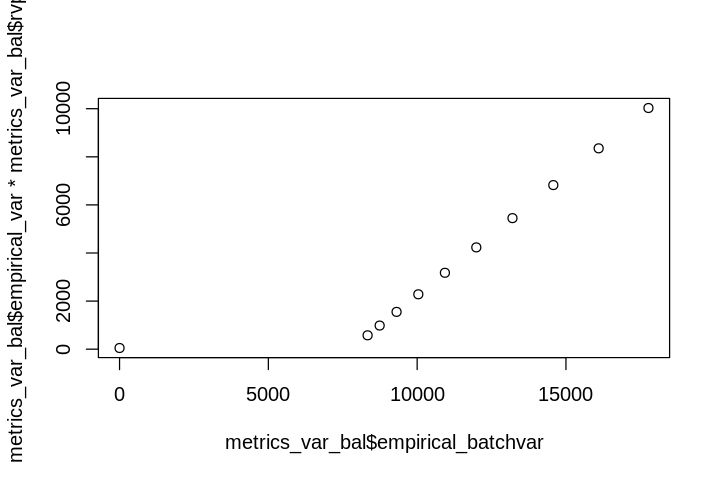

In [88]:
plot(metrics_var_bal$empirical_batchvar, metrics_var_bal$empirical_var * metrics_var_bal$rvp)

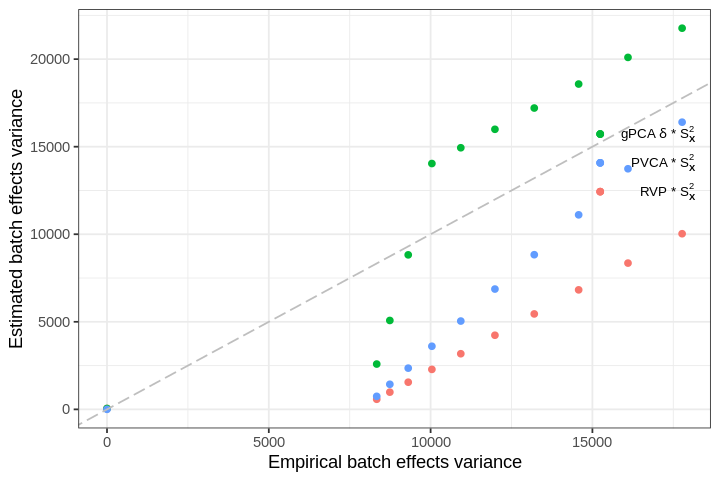

In [89]:
var_labs <- c(var_gpca_lab, var_pvca_lab, var_rvp_lab)
label1 <- 'Empirical batch effects variance'
label2 <- 'Estimated batch effects variance'

ax <- ggplot(metrics_var_bal) +
  geom_point(aes(x = empirical_batchvar, y = rvp * empirical_var, col = 'RVP')) + 
  geom_point(aes(x = empirical_batchvar, y = gpca * empirical_var, col = 'gPCA')) + 
  geom_point(aes(x = empirical_batchvar, y = pvca.batch * empirical_var, col = 'PVCA')) + 
  geom_abline(slope = 1, intercept = 0, col = 'gray', linetype = 'longdash') +
  labs(x = label1, y = label2) +
  scale_color_manual(values = ggcols, labels = var_labs) +
#   scale_x_continuous(breaks = seq(0, 2e11, by = 1e11)) +
  theme(
    legend.text = element_text(size = 8),
    legend.position = c(.99, .78),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.key = element_rect(fill='transparent'),
    legend.background = element_rect(fill='transparent'),
    legend.title = element_blank()
  )
ax

In [54]:
file <- '~/Dropbox/tmp/additive_bal-est_empirical.pdf'
ggsave(file, ax, width = 4, height = 3)

### Variance due to batch effects

In [42]:
ggcols <- ggplot_palette(3)
names(ggcols) <- c('RVP', 'gPCA', 'PVCA')

var_gpca_lab <- expression(paste("gPCA ", delta, " * ", S[bold(X)]^2))
var_pvca_lab <- expression(paste("PVCA * ", S[bold(X)]^2))
var_rvp_lab <- expression(paste("RVP * ", S[bold(X)]^2))

In [35]:
label1 <- 'Theoretical batch effects variance'

ax <- ggplot(metrics_var) +
  geom_line(aes(x = var_delta, y = pvca.batch * var_total, col = 'PVCA'), show.legend = F) + 
  geom_abline(slope = 1, intercept = 0, col = 'gray', linetype = 'longdash') +
  scale_color_manual(values = ggcols) +
  scale_x_continuous(breaks = seq(0, 2e11, by = 1e11)) +
  theme(text = element_text(size = 10)) +
  labs(x = label1, y = var_pvca_lab) +
  ylim(0, 5e11)

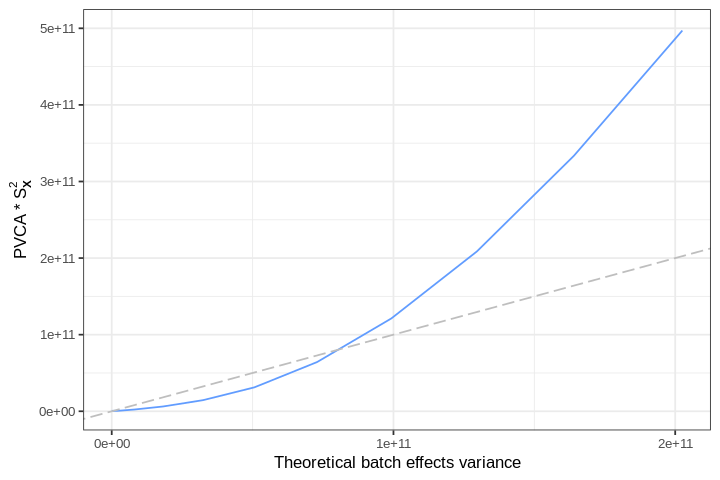

In [36]:
ax

In [609]:
file <- '~/Dropbox/tmp/var_bal-pvca.pdf'
ggsave(file, ax, width = 3, height = 2.5)

#### Combined

In [39]:
var_labs <- c(var_gpca_lab, var_pvca_lab, var_rvp_lab)
label1 <- 'Theoretical batch effects variance'
label2 <- 'Estimated batch effects variance'

ax <- ggplot(metrics_var) +
  geom_line(aes(x = var_delta, y = rvp * var_total, col = 'RVP')) + 
  geom_line(aes(x = var_delta, y = gpca * var_total, col = 'gPCA')) + 
  geom_line(aes(x = var_delta, y = pvca.batch * var_total, col = 'PVCA')) + 
  geom_abline(slope = 1, intercept = 0, col = 'gray', linetype = 'longdash') +
  labs(x = label1, y = label2) +
  scale_color_manual(values = ggcols, labels = var_labs) +
  scale_x_continuous(breaks = seq(0, 2e11, by = 1e11)) +
  theme(
    legend.text = element_text(size = 8),
    legend.position = c(.99, .85),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.key = element_rect(fill='transparent'),
    legend.background = element_rect(fill='transparent'),
    legend.title = element_blank()
  )
#   ylim(0, 2.4e11)

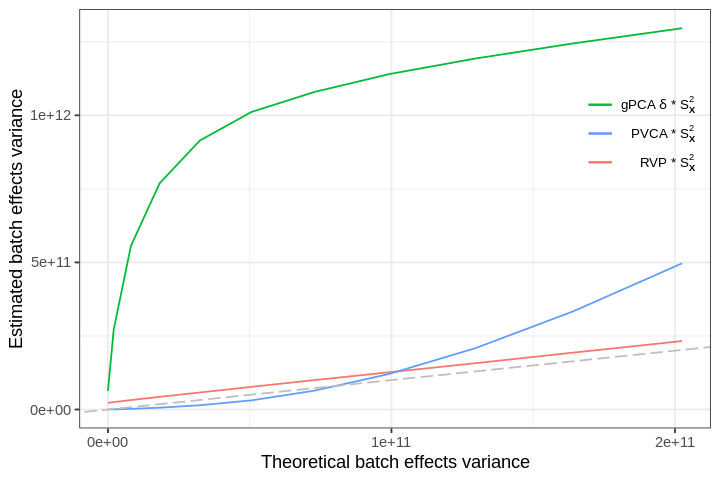

In [40]:
ax

In [987]:
file <- '~/Dropbox/tmp/var_bal.pdf'
ggsave(file, ax, width = 3.5, height = 3)

### Percentage of batch effects in data

In [41]:
# nbatch <- 2
# ncond <- 2
# npercond <- 20
n <- 80
ngenes <- 8000

basemean <- 5000
basedisp <- 2000
ggstep <- 100
bdispstep <- 0
swvar <- 2000

batch_delta <- 1000
class_delta <- 10000

In [42]:
calc_pct_expression <- function(
  delta_k, delta_g, delta_i, 
  n_i, n_j, alpha, epsilon,
  ret.obj = F
) {
  if (length(delta_i) != n_i)
    stop(sprintf('delta_i has to be of length %d', n_i))
  
  n_k <- n / 2 
  n_g <- n / 2
  total_batch <- n_i * n_k * delta_k
  # Assumption: Two batches with same size and two classes with same size
  total_x1 <- n_i * n_j * alpha + n_i * n_j * epsilon * 0.5 +
    n_i * n_g * delta_g + n_j * sum(delta_i)
  
  if (ret.obj)
    return(c(total_batch = total_batch, total_x = total_x1))
  
  total_batch / total_x1
}

In [43]:
batch_deltas <- seq(0, 10000, by = 1000)
delta_i <- seq(0, length.out = ngenes, by = ggstep)
pct_magnitude <- sapply(
  batch_deltas,
  calc_pct_expression,
  class_delta, delta_i,
  ngenes, n, basemean, swvar
)
names(pct_magnitude) <- batch_deltas

In [44]:
metrics_magnitude <-  data.frame(pct_magnitude) %>%
  rownames_to_column(var = 'batch_delta') %>%
  merge(metrics_short, by = 'batch_delta') %>%
  mutate_all(function(x) as.numeric(as.character(x)))

In [66]:
gpca_lab <- expression(paste("gPCA ", delta))
xlab <- 'Percentage of batch effects in data'

metric <- 'PVCA'
ax <- ggplot(metrics_magnitude) +
  geom_line(aes(x = pct_magnitude, y = pvca.batch, col = metric), show.legend = F) + 
  geom_abline(slope = 1, intercept = 0, col = 'gray', linetype = 'longdash') +
  labs(x = xlab, y = metric) +
  scale_color_manual(values = ggcols, labels = metric) +
  scale_x_continuous(breaks = seq(0, 0.01, by = 0.005))
#   ylim(0, 0.18)

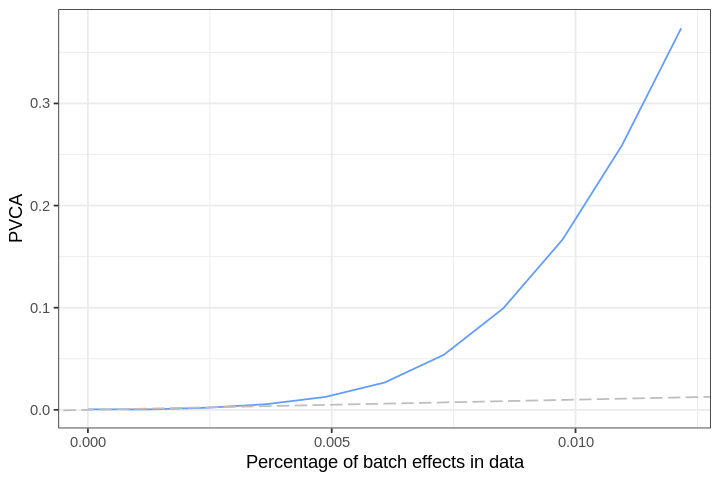

In [67]:
ax

In [1000]:
file <- '~/Dropbox/tmp/pct_magnitude_bal-rvp.pdf'
ggsave(file, ax, width = 3, height = 2.5)

#### Combined

In [63]:
xlab <- 'Percentage of batch effects in data'
ylab <- 'Metric value'

gpca_lab <- expression(paste("gPCA ", delta))
metric_labs <- c(gpca_lab, 'PVCA', 'RVP')
ax <- ggplot(metrics_magnitude) +
  geom_line(aes(x = pct_magnitude, y = rvp, col = 'RVP')) + 
  geom_line(aes(x = pct_magnitude, y = gpca, col = 'gPCA')) + 
  geom_line(aes(x = pct_magnitude, y = pvca.batch, col = 'PVCA')) + 
  geom_abline(slope = 1, intercept = 0, col = 'gray', linetype = 'longdash') +
  labs(x = 'Percentage of batch effects in data', y = 'Metric value') +
  scale_x_continuous(breaks = seq(0, 0.01, by = 0.005)) +
  ylim(0, 1) +
  labs(x = xlab, y = ylab) +
  scale_color_manual(values = ggcols, labels = metric_labs) +
  theme(
    legend.text = element_text(size = 8),
    legend.position = c(.99, .85),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.key = element_rect(fill='transparent'),
    legend.background = element_rect(fill='transparent'),
    legend.title = element_blank()
  )

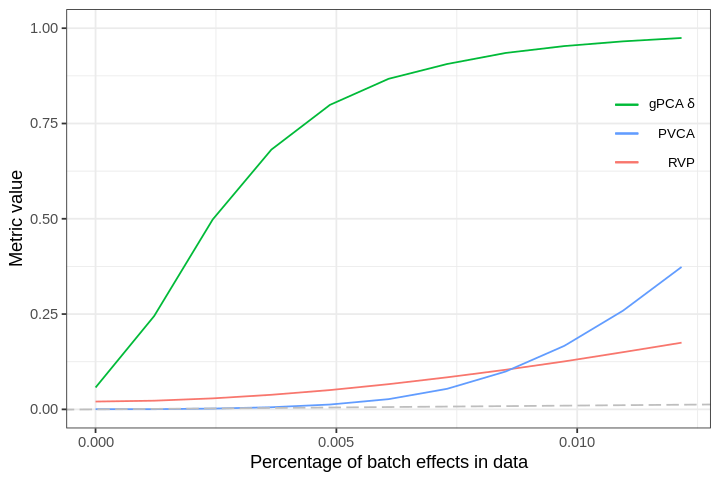

In [64]:
ax

In [65]:
file <- '~/Dropbox/tmp/pct_magnitude_bal.pdf'
ggsave(file, ax, width = 3.5, height = 3)

In [507]:
# theoretical v.s. empirical expected sum
totals <- calc_pct_expression(
  0, class_delta, delta_i,
  ngenes, n, basemean, swvar, ret.obj = T
)

X_0 <- list_data[['0']]
empirical_sum <- sum(rowSums(X_0))
theoretical_sum <- totals['total_x']
(empirical_sum - theoretical_sum) / empirical_sum

## Imbalanced

In [62]:
dir <- '../data/batchqc/small/additive/imbalanced'
files <- list.files(dir, full.names = T)
files <- files[c(1:2, 4:11, 3)]
print(files)
list_data <- lapply(files, read.table, sep = "\t", header = T, row.names = 1)

 [1] "../data/batchqc/small/additive/imbalanced/imbal-0.tsv"    
 [2] "../data/batchqc/small/additive/imbalanced/imbal-1000.tsv" 
 [3] "../data/batchqc/small/additive/imbalanced/imbal-2000.tsv" 
 [4] "../data/batchqc/small/additive/imbalanced/imbal-3000.tsv" 
 [5] "../data/batchqc/small/additive/imbalanced/imbal-4000.tsv" 
 [6] "../data/batchqc/small/additive/imbalanced/imbal-5000.tsv" 
 [7] "../data/batchqc/small/additive/imbalanced/imbal-6000.tsv" 
 [8] "../data/batchqc/small/additive/imbalanced/imbal-7000.tsv" 
 [9] "../data/batchqc/small/additive/imbalanced/imbal-8000.tsv" 
[10] "../data/batchqc/small/additive/imbalanced/imbal-9000.tsv" 
[11] "../data/batchqc/small/additive/imbalanced/imbal-10000.tsv"


In [63]:
ids <- files %>%
  sapply(function(x) substring(x, 49), USE.NAMES = F) %>%
  sapply(function(x) strsplit(x, '\\.')[[1]][[1]], USE.NAMES = F)
print(ids)
names(list_data) <- ids

 [1] "0"     "1000"  "2000"  "3000"  "4000"  "5000"  "6000"  "7000"  "8000" 
[10] "9000"  "10000"


In [64]:
# metadata
ncond <- 30
batch <- as.factor(rep(1:2, each = ncond * 2))
class <- rep(rep(LETTERS[1:2], each = ncond), 2)
metadata <- data.frame(batch, class, row.names = colnames(list_data[[1]]))

In [65]:
# subsampling
# severe imbalance (1:3)
idx <- c(seq(21, 100))

metadata_imbal <- metadata[idx, ]
print(table(metadata_imbal))
list_imbal <- lapply(list_data, function(X) X[, idx])

     class
batch  A  B
    1 10 30
    2 30 10


## PCA

In [50]:
mags <- names(list_data)
for (i in mags) {
  ax <- ggplot_pca(
    list_imbal[[i]], metadata_imbal,
    col = "batch", shape = "class",
    show.legend = FALSE
  )
  file <- sprintf("~/Dropbox/tmp/pca-additive_imbal_%s.pdf", i)
  ggsave(file, ax, width = 3.5, height = 3)
}

## Measure batch effects

In [91]:
list_metrics_imbal <- lapply(list_imbal, quantify_batch, metadata_imbal)

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) 

In [92]:
metrics_imbal <- list_metrics_imbal %>%
  data.frame() %>%
  t() %>%
  data.frame()

#### Empirical 1
Var(X' - X)

In [93]:
var_matrix <- function(X, axis = 1) {
  sigma2 <- apply(X, axis, var)
  sum(sigma2)
}

In [94]:
list_deltas_imbal <- lapply(list_imbal, function(X) X - list_imbal[[1]])
empirical_batchvars1_imbal <- sapply(list_deltas_imbal, var_matrix)

In [98]:
# as.vector(data.matrix(list_deltas_imbal[[2]][1,]))

[1]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[16]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[31]    0    0    0    0    0    0    0    0    0    0 1115 1023 1056  981 1015
[46] 1050  987 1001  983 1043  940 1036  975 1008  966  994 1002  955 1043  957
[61] 1013 1035 1014  956 1019 1069 1004  985 1030 1020  962  978 1000  992 1000
[76] 1007 1013  981  963  996

#### Empirical 2
Var(X') - Var(X)

In [99]:
vars_imbal <- sapply(list_imbal, var_matrix)
empirical_batchvars2_imbal <- vars_imbal - vars_imbal[1]

#### Plot: Empirical v.s. theoretical

In [100]:
metrics_var_imbal <- cbind(
  metrics_imbal,
  empirical_var = vars_imbal,
  empirical_batchvar = empirical_batchvars1_imbal,
  theoretical_batchvar = theoretical_batchvars
)

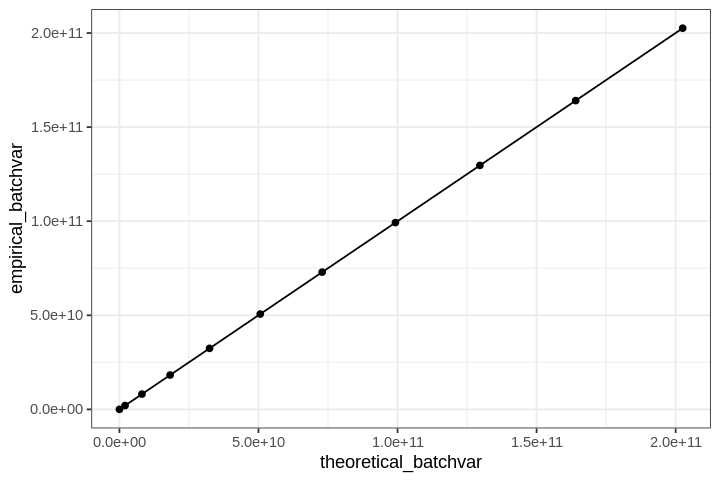

In [102]:
# comparison: additive
ax <- ggplot(
  metrics_var_imbal,
  aes(x = theoretical_batchvar, y = empirical_batchvar)
) +
  geom_point() +
  geom_line()
ax

file <- '~/Dropbox/tmp/additive_imbal-empirical_theoretical.pdf'
ggsave(file, ax, width = 4, height = 3)

#### Plot: Estimated v.s. empirical

In [103]:
var_labs <- c(var_gpca_lab, var_pvca_lab, var_rvp_lab)
label1 <- 'Empirical batch effects variance'
label2 <- 'Estimated batch effects variance'

ax <- ggplot(metrics_var_imbal) +
  geom_line(aes(x = empirical_batchvar, y = rvp * empirical_var, col = 'RVP')) + 
  geom_line(aes(x = empirical_batchvar, y = gpca * empirical_var, col = 'gPCA')) + 
  geom_line(aes(x = empirical_batchvar, y = pvca.batch * empirical_var, col = 'PVCA')) + 
  geom_abline(slope = 1, intercept = 0, col = 'gray', linetype = 'longdash') +
  labs(x = label1, y = label2) +
  scale_color_manual(values = ggcols, labels = var_labs) +
#   scale_x_continuous(breaks = seq(0, 2e11, by = 1e11)) +
  theme(
    legend.text = element_text(size = 8),
    legend.position = c(.99, .72),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.key = element_rect(fill='transparent'),
    legend.background = element_rect(fill='transparent'),
    legend.title = element_blank()
  )

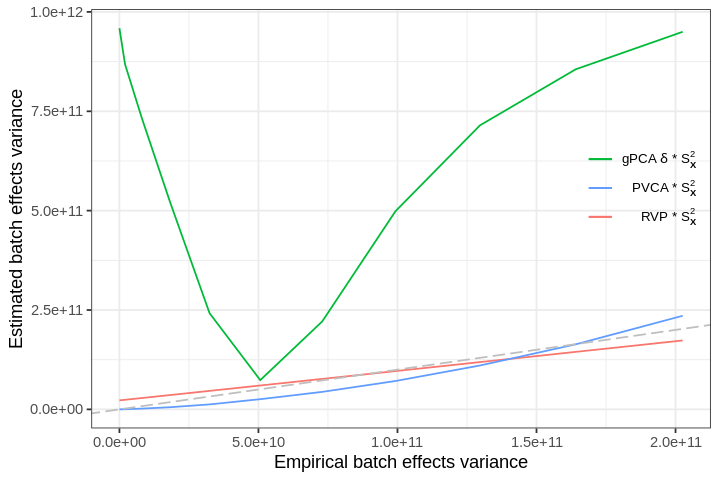

In [104]:
ax

In [105]:
file <- '~/Dropbox/tmp/additive_imbal-est_empirical.pdf'
ggsave(file, ax, width = 4, height = 3)

### Plots

In [ ]:
# feature
for (delta_batch in seq(0, 10000, 1000)) {
  idx <- as.character(delta_batch)
  X <- list_imbal[[idx]]
  feature <- cbind(
    value = as.vector(data.matrix(X[1, ])),
    metadata_imbal
  )
  ax <- ggplot(feature) +
    geom_point(
      aes(x = class, y = value, color = batch),
      position = position_jitterdodge(), cex = 1.2
    ) +
    ylim(5000, 30000) +
    geom_hline(yintercept = mean(feature$value), linetype = 'longdash') +
    labs(title = sprintf('Variance = %.2e', var(feature$value)))
  
  file <- sprintf('~/Dropbox/tmp/feature1_additive_imbal-%s.pdf', idx)
  ggsave(file, ax, width = 5, height = 3)
}

In [301]:
# pca
for (delta_batch in seq(0, 10000, 1000)) {
  idx <- as.character(delta_batch)
  ax <- ggplot_pca(
    list_imbal[[idx]], metadata_imbal,
    color = 'batch', pch = 'class'
  )
  ax
  file <- sprintf('~/Dropbox/tmp/pca_additive_imbal-%s.pdf', idx)
  ggsave(file, ax, width = , height = 3)
}

## Imbalanced - Opposite subsampling

In [50]:
# opposite subsampling
idx1 <- c(1:40, 81:120)
metadata_imbal1 <- metadata[idx1, ]
list_imbal1 <- lapply(list_data, function(X) X[, idx1])

In [51]:
vars_imbal1 <- sapply(list_imbal1, var_matrix)
empirical_batchvars_imbal1 <- vars_imbal1 - vars_imbal1[1]

In [52]:
list_metrics_imbal1 <- lapply(list_imbal1, quantify_batch, metadata_imbal1)

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) 

In [53]:
metrics_imbal1 <- list_metrics_imbal1 %>%
  data.frame() %>%
  t() %>%
  data.frame()

In [54]:
metrics_var_imbal1 <- cbind(
  metrics_imbal1,
  empirical_var = vars_imbal1,
  empirical_batchvar = empirical_batchvars_imbal1,
  theoretical_batchvar = theoretical_batchvars
)

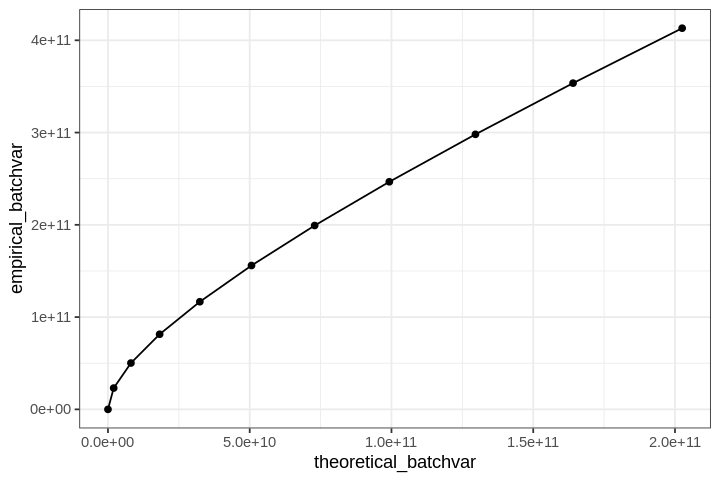

In [360]:
# comparison
ax <- ggplot(
  metrics_var_imbal1,
  aes(x = theoretical_batchvar, y = empirical_batchvar)
) +
  geom_point() +
  geom_line()
ax

file <- '~/Dropbox/tmp/additive_imbal1-empirical_theoretical.pdf'
ggsave(file, ax, width = 4, height = 3)

In [342]:
# feature
for (delta_batch in seq(0, 10000, 1000)) {
  idx <- as.character(delta_batch)
  X <- list_imbal1[[idx]]
  feature <- cbind(
    value = as.vector(data.matrix(X[1, ])),
    metadata_imbal
  )
  ax <- ggplot(feature) +
    geom_point(
      aes(x = class, y = value, color = batch),
      position = position_jitterdodge(), cex = 1.2
    ) +
    ylim(5000, 30000) +
    geom_hline(yintercept = mean(feature$value), linetype = 'longdash') +
    labs(title = sprintf('Variance = %.2e', var(feature$value)))
  
  file <- sprintf('~/Dropbox/tmp/feature1_additive_imbal1-%s.pdf', idx)
  ggsave(file, ax, width = 5, height = 3)
}

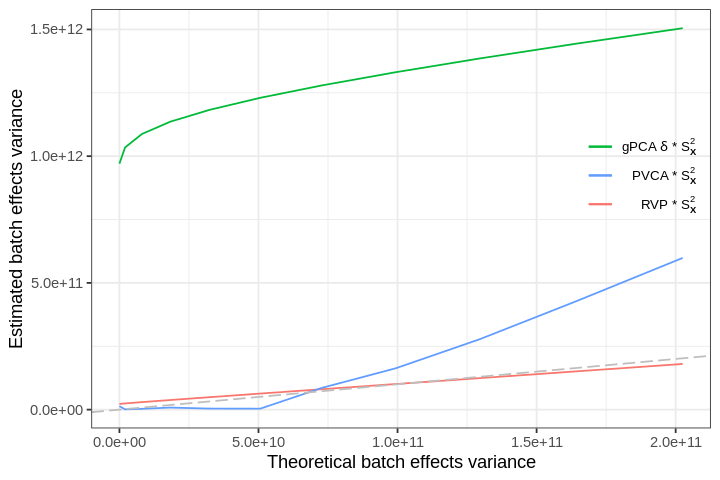

In [82]:
var_labs <- c(var_gpca_lab, var_pvca_lab, var_rvp_lab)
label1 <- 'Theoretical batch effects variance'
label2 <- 'Estimated batch effects variance'

ax <- ggplot(metrics_var_imbal1) +
  geom_line(aes(x = theoretical_batchvar, y = rvp, col = 'RVP')) + 
  geom_line(aes(x = theoretical_batchvar, y = gpca, col = 'gPCA')) + 
  geom_line(aes(x = theoretical_batchvar, y = pvca.batch * empirical_var, col = 'PVCA')) + 
  geom_abline(slope = 1, intercept = 0, col = 'gray', linetype = 'longdash') +
  labs(x = label1, y = label2) +
  scale_color_manual(values = ggcols, labels = var_labs) +
#   scale_x_continuous(breaks = seq(0, 2e11, by = 1e11)) +
  theme(
    legend.text = element_text(size = 8),
    legend.position = c(.99, .75),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.key = element_rect(fill='transparent'),
    legend.background = element_rect(fill='transparent'),
    legend.title = element_blank()
  )
ax

# file <- '~/Dropbox/tmp/additive_imbal1-est_theoretical.pdf'
# ggsave(file, ax, width = 4, height = 3)

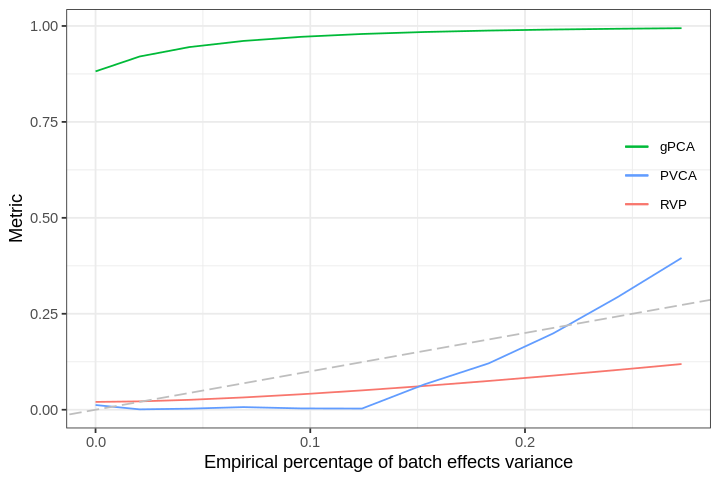

In [86]:
var_labs <- c(var_gpca_lab, var_pvca_lab, var_rvp_lab)
label1 <- 'Empirical percentage of batch effects variance'
label2 <- 'Metric'

ax <- ggplot(metrics_var_imbal1) +
  geom_line(aes(x = empirical_batchvar / empirical_var, y = rvp, col = 'RVP')) + 
  geom_line(aes(x = empirical_batchvar / empirical_var, y = gpca, col = 'gPCA')) + 
  geom_line(aes(x = empirical_batchvar / empirical_var, y = pvca.batch, col = 'PVCA')) + 
  geom_abline(slope = 1, intercept = 0, col = 'gray', linetype = 'longdash') +
  labs(x = label1, y = label2) +
  scale_color_manual(values = ggcols) +
#   scale_x_continuous(breaks = seq(0, 2e11, by = 1e11)) +
  theme(
    legend.text = element_text(size = 8),
    legend.position = c(.99, .75),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.key = element_rect(fill='transparent'),
    legend.background = element_rect(fill='transparent'),
    legend.title = element_blank()
  )
ax

file <- '~/Dropbox/tmp/additive_imbal1-metric_empirical_pct.pdf'
ggsave(file, ax, width = 4, height = 3)

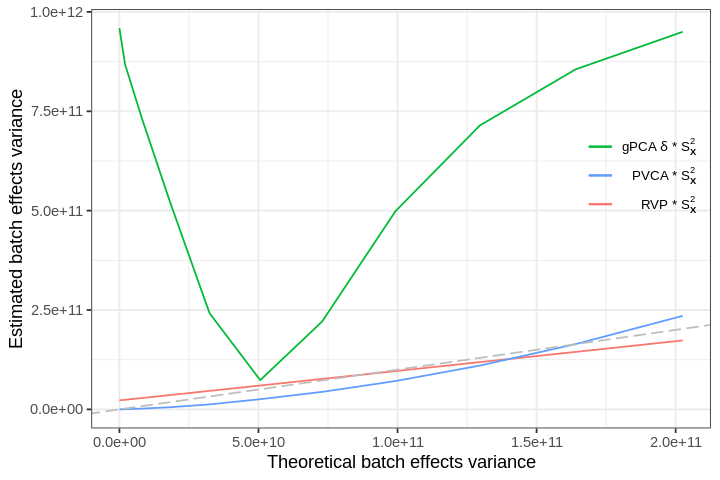

In [79]:
# TODO: Investigate
var_labs <- c(var_gpca_lab, var_pvca_lab, var_rvp_lab)
label1 <- 'Theoretical batch effects variance'
label2 <- 'Estimated batch effects variance'

ax <- ggplot(metrics_var_imbal) +
  geom_line(aes(x = theoretical_batchvar, y = rvp * empirical_var, col = 'RVP')) + 
  geom_line(aes(x = theoretical_batchvar, y = gpca * empirical_var, col = 'gPCA')) + 
  geom_line(aes(x = theoretical_batchvar, y = pvca.batch * empirical_var, col = 'PVCA')) + 
  geom_abline(slope = 1, intercept = 0, col = 'gray', linetype = 'longdash') +
  labs(x = label1, y = label2) +
  scale_color_manual(values = ggcols, labels = var_labs) +
#   scale_x_continuous(breaks = seq(0, 2e11, by = 1e11)) +
  theme(
    legend.text = element_text(size = 8),
    legend.position = c(.99, .75),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.key = element_rect(fill='transparent'),
    legend.background = element_rect(fill='transparent'),
    legend.title = element_blank()
  )

ax

### Theoretical variance due to batch effects

In [74]:
n <- 80
ngenes <- 8000
var_total <- sapply(list_imbal, function(X) sum(apply(X, 1, var)))
metrics_imbal_var <-  data.frame(var_total) %>%
  rownames_to_column(var = 'batch_delta') %>%
  merge(metrics_imbal_short, by = 'batch_delta') %>%
  mutate_all(function(x) as.numeric(as.character(x))) %>%
  mutate(var_delta = (batch_delta / 2) ^ 2 * n * ngenes / (n - 1)) %>%
  mutate(pct_var = var_delta / var_total)

In [75]:
label1 <- 'Theoretical batch effects variance'
metric <- 'gPCA'
ax <- ggplot(metrics_imbal_var) +
  geom_line(aes(x = var_delta, y = gpca * var_total, col = metric), show.legend = F) + 
  geom_abline(slope = 1, intercept = 0, col = 'gray', linetype = 'longdash') +
  labs(x = label1, y = var_gpca_lab) +
  scale_x_continuous(breaks = seq(0, 2e11, by = 1e11)) +
  scale_color_manual(values = ggcols, labels = metric) +
  theme(text = element_text(size = 10))
#   ylim(0, 1.8e11)

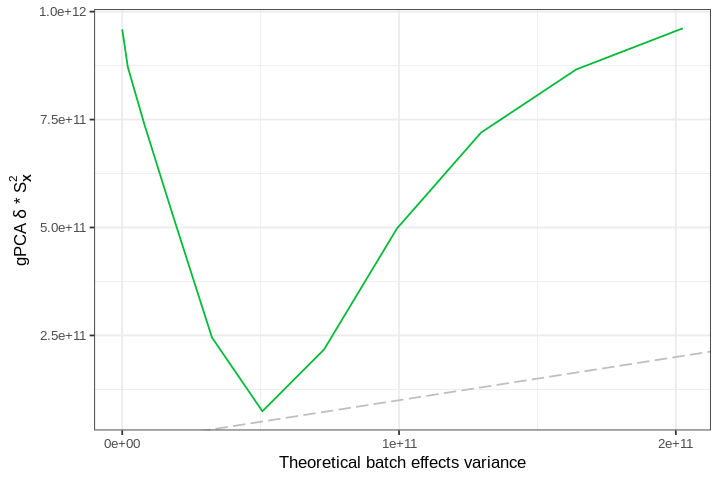

In [76]:
ax

In [682]:
# file <- '~/Dropbox/tmp/var_imbal-rvp.pdf'
# ggsave(file, ax, width = 3, height = 2.5)

#### Combined

In [77]:
var_labs <- c(var_gpca_lab, var_pvca_lab, var_rvp_lab)
label1 <- 'Theoretical batch effects variance'
label2 <- 'Estimated batch effects variance'

ax <- ggplot(metrics_imbal_var) +
  geom_line(aes(x = var_delta, y = rvp * var_total, col = 'RVP')) + 
  geom_line(aes(x = var_delta, y = gpca * var_total, col = 'gPCA')) + 
  geom_line(aes(x = var_delta, y = pvca.batch * var_total, col = 'PVCA')) + 
  geom_abline(slope = 1, intercept = 0, col = 'gray', linetype = 'longdash') +
  labs(x = label1, y = label2) +
  scale_color_manual(values = ggcols, labels = var_labs) +
  scale_x_continuous(breaks = seq(0, 2e11, by = 1e11)) +
  theme(
    legend.text = element_text(size = 8),
    legend.position = c(.99, .68),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.key = element_rect(fill='transparent'),
    legend.background = element_rect(fill='transparent'),
    legend.title = element_blank()
  )

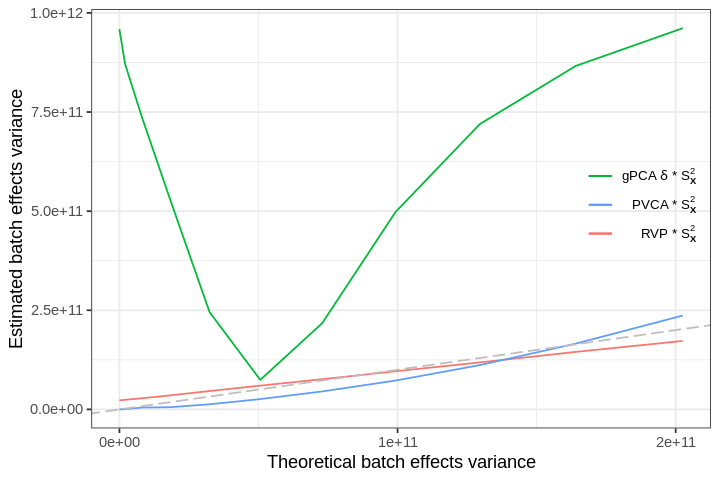

In [78]:
ax

In [915]:
file <- '~/Dropbox/tmp/var_imbal.pdf'
ggsave(file, ax, width = 3.5, height = 3)

### Percentage of batch effects in data

In [82]:
n <- 80
ngenes <- 8000

basemean <- 5000
basedisp <- 2000
ggstep <- 100
bdispstep <- 0
swvar <- 2000

batch_delta <- 1000
class_delta <- 10000

In [83]:
batch_deltas <- seq(0, 10000, by = 1000)
delta_i <- seq(0, length.out = ngenes, by = ggstep)
pct_magnitude <- sapply(
  batch_deltas,
  calc_pct_expression,
  class_delta, delta_i,
  ngenes, n, basemean, swvar
)
names(pct_magnitude) <- batch_deltas

In [84]:
metrics_imbal_magnitude <-  data.frame(pct_magnitude) %>%
  rownames_to_column(var = 'batch_delta') %>%
  merge(metrics_imbal_short, by = 'batch_delta') %>%
  mutate_all(function(x) as.numeric(as.character(x)))

In [85]:
gpca_lab <- expression(paste("gPCA ", delta))

metric <- 'PVCA'
ax <- ggplot(metrics_imbal_magnitude) +
  geom_line(aes(x = pct_magnitude, y = pvca.batch, col = metric), show.legend = F) + 
  geom_abline(slope = 1, intercept = 0, col = 'gray', linetype = 'longdash') +
  labs(x = 'Percentage of batch effects in data', y = metric) +
  scale_color_manual(values = ggcols, labels = metric) +
  scale_x_continuous(breaks = seq(0, 0.01, by = 0.005))
#   ylim(0, 1)

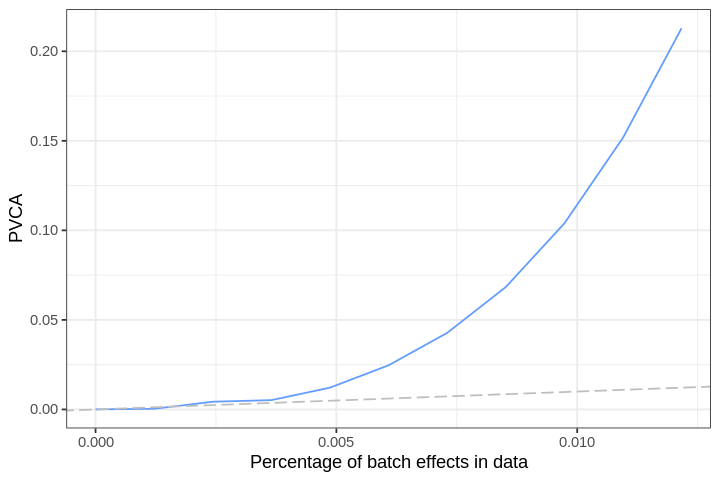

In [86]:
ax

In [663]:
file <- '~/Dropbox/tmp/pct_magnitude_imbal-pvca.pdf'
ggsave(file, ax, width = 3, height = 2.5)

#### Combined

In [90]:
gpca_lab <- expression(paste("gPCA ", delta))
metric_labs <- c(gpca_lab, 'PVCA', 'RVP')

xlab <- 'Percentage of batch effects in data'
ylab <- 'Metric value'

ax <- ggplot(metrics_imbal_magnitude) +
  geom_line(aes(x = pct_magnitude, y = rvp, col = 'RVP')) + 
  geom_line(aes(x = pct_magnitude, y = gpca, col = 'gPCA')) + 
  geom_line(aes(x = pct_magnitude, y = pvca.batch, col = 'PVCA')) + 
  geom_abline(slope = 1, intercept = 0, col = 'gray', linetype = 'longdash') +
  labs(x = 'Percentage of batch effects in data', y = 'Metric value') +
  scale_x_continuous(breaks = seq(0, 0.01, by = 0.005)) +
  ylim(0, 1) +
  labs(x = xlab, y = ylab) +
  scale_color_manual(values = ggcols, labels = metric_labs) +
  theme(
    legend.text = element_text(size = 8),
    legend.position = c(.99, .58),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.key = element_rect(fill='transparent'),
    legend.background = element_rect(fill='transparent'),
    legend.title = element_blank()
  )

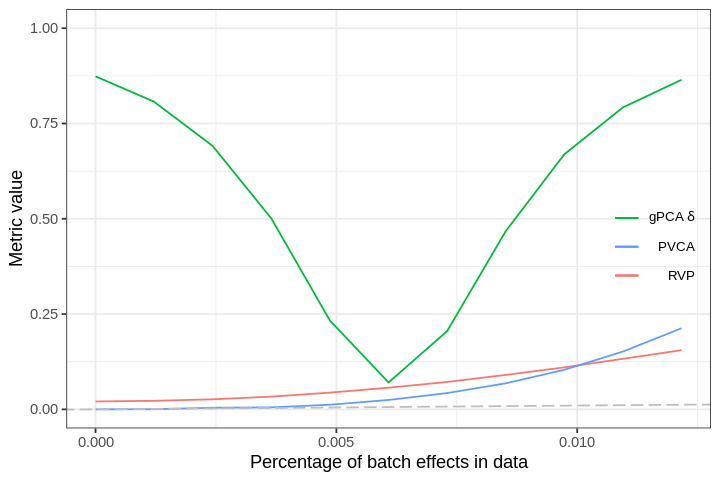

In [91]:
ax

In [92]:
file <- '~/Dropbox/tmp/pct_magnitude_imbal.pdf'
ggsave(file, ax, width = 3.5, height = 3)